# Imports #

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# Load data set #

In [6]:
data = pd.read_csv('/content/creditcard.csv')

# Check the data

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

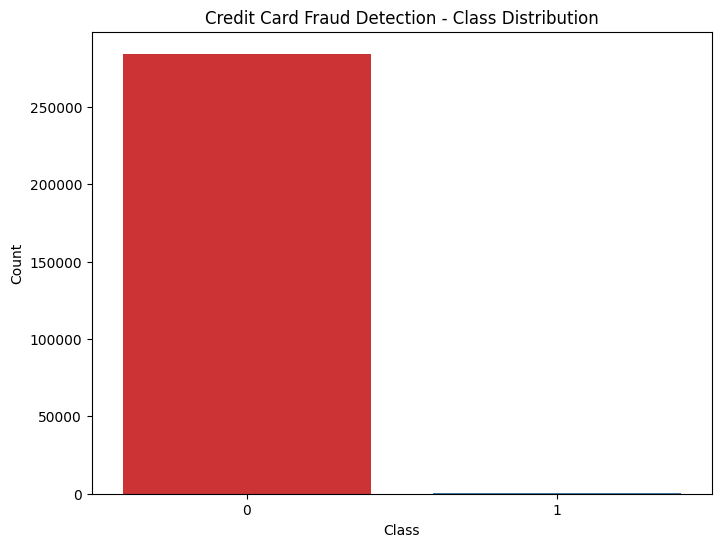

In [21]:
class_distribution = data['Class'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Credit Card Fraud Detection - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

I can see that out data is highly unbalanced. This graph above shows the unbalance between the legit (0) and the fraud (1) transactions.

In [22]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [23]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


#Lets see the amount of money the dataset has for each class of transaction

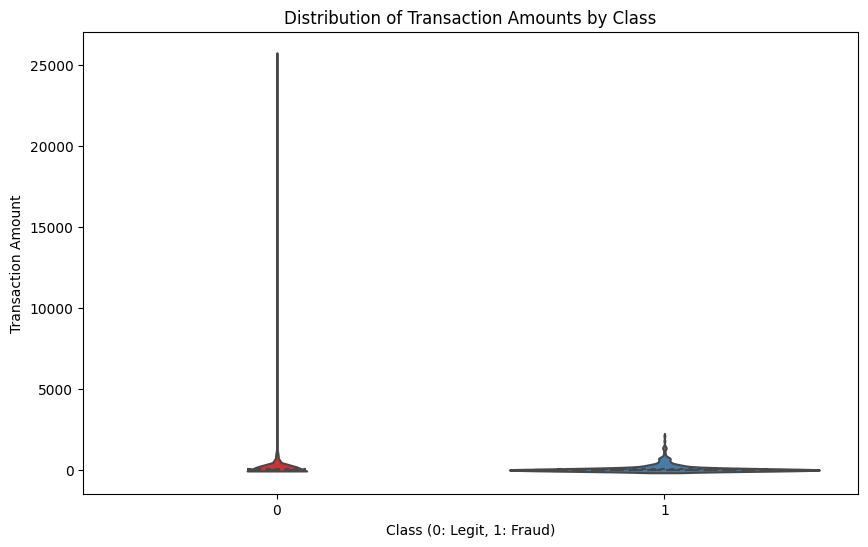

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=data, palette='Set1', inner='quartile')
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


Now I can see that of course the legit class will have a higher total amount of transcation due to the unbalance between the two classes

In [28]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Even though the legit transactions have a higher count of transactions the mean amount for fraud transactions is way higher than the legit transactions. I can also see that the max of the fraud transactions is also way higher. This gives me a good picture between these two classes.  

In [30]:
#lets compare the values for the transactions of both classes
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-Sampling

In [31]:
legit_sample = legit.sample(n=492)

# Concat the two data frames

In [32]:
new_data = pd.concat([legit_sample, fraud], axis=0)

In [33]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
250592,154985.0,1.974428,-0.509228,-0.404570,0.273696,-0.615464,-0.101159,-0.766450,0.130711,1.009490,...,0.276085,0.959972,0.079977,-0.340899,-0.233609,0.650033,-0.027724,-0.064429,5.99,0
88324,62091.0,1.275251,0.179546,0.188190,0.310702,-0.016668,-0.194124,-0.055987,-0.007657,-0.163469,...,-0.259563,-0.781330,0.021250,-0.501232,0.298816,0.128259,-0.033759,0.000568,1.98,0
82802,59557.0,-1.011491,1.004628,1.204410,0.813070,0.331559,-0.731188,1.188581,-0.827030,0.199877,...,0.008742,0.470729,-0.047678,0.403668,0.024343,-0.405261,-0.849799,-0.146178,21.00,0
127412,78324.0,1.215699,0.253676,0.164561,0.934410,-0.104743,-0.466317,0.078093,-0.036080,-0.174414,...,0.054150,0.132858,-0.149378,0.001289,0.681638,-0.324210,0.005186,0.006476,8.72,0
159344,112410.0,2.024119,-0.246405,-1.454171,0.095073,0.062402,-0.598012,-0.102034,0.001281,0.823851,...,0.299993,0.873935,0.041253,0.667540,0.224765,-0.462418,-0.011515,-0.061867,1.00,0


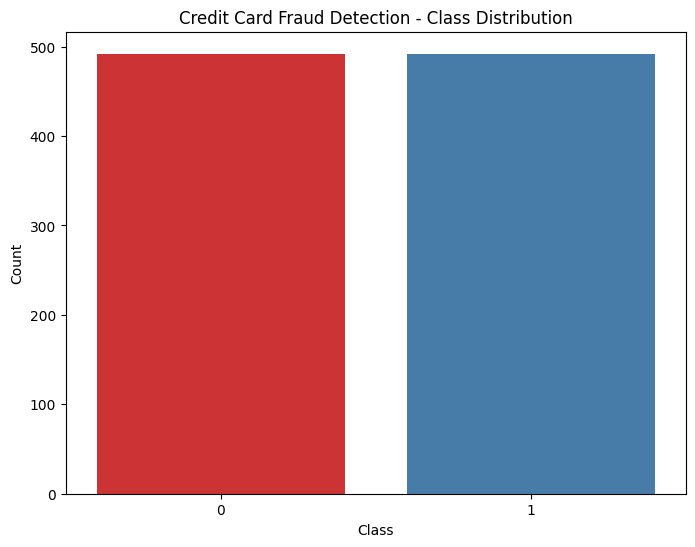

In [34]:
class_distribution = data['Class'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_data, palette='Set1')
plt.title('Credit Card Fraud Detection - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

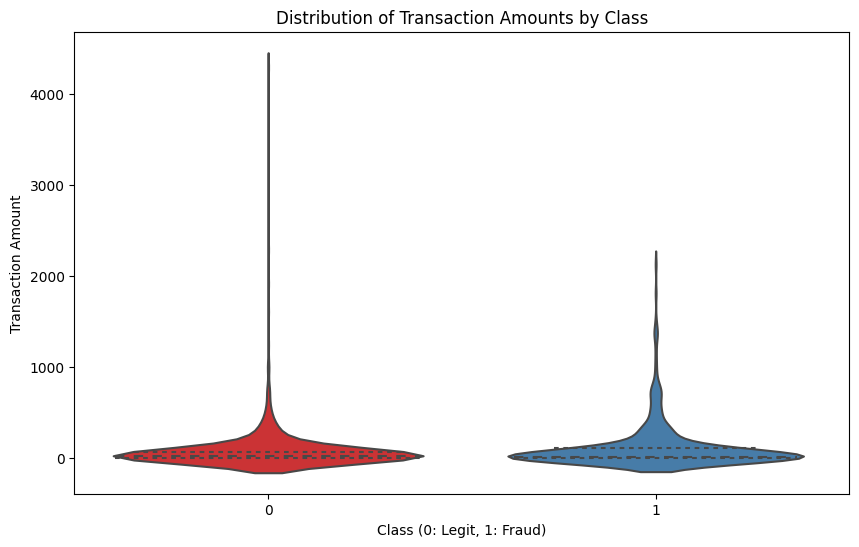

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=new_data, palette='Set1', inner='quartile')
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


Since the fraud class has 492 transactions I took 492 random data points from the legit transactions that has 284,315. I concat them in a new data frame and now I have a well distributed dataset

In [37]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [38]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92030.233740,0.081744,-0.023606,0.134423,-0.031104,-0.004765,0.039419,0.010567,0.066425,0.060657,...,0.050046,0.052760,0.048255,-0.026689,0.051972,-0.006058,-0.012500,0.001449,-0.003449,90.962297
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#Split data into their perspective features and targets

In [45]:
X = new_data.drop(columns= 'Class', axis = 1)
Y = new_data['Class']
print(X,Y)

            Time        V1        V2        V3        V4        V5        V6  \
250592  154985.0  1.974428 -0.509228 -0.404570  0.273696 -0.615464 -0.101159   
88324    62091.0  1.275251  0.179546  0.188190  0.310702 -0.016668 -0.194124   
82802    59557.0 -1.011491  1.004628  1.204410  0.813070  0.331559 -0.731188   
127412   78324.0  1.215699  0.253676  0.164561  0.934410 -0.104743 -0.466317   
159344  112410.0  2.024119 -0.246405 -1.454171  0.095073  0.062402 -0.598012   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Split the Data Into Training and Testing Data

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [51]:
print(X.shape, Xtrain.shape, Xtest.shape)

(984, 30) (787, 30) (197, 30)


# Model Training with training data (Logistic Regression)

In [68]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
Xtrain_prediction = model.predict(Xtrain)
training_data_accuracy= accuracy_score(Xtrain_prediction, ytrain)
print("Accuracy on the training data:",training_data_accuracy )

Accuracy on the training data: 0.9428208386277002


# Model Training with the test data

In [75]:
Xtest_prediction = model.predict(Xtest)
test_data_accuracy = accuracy_score(Xtest_prediction, ytest)
print ('Accuracy score on the Test Data', test_data_accuracy)

Accuracy score on the Test Data 0.9390862944162437


# Comparison of Accuracies: We got for the training data an accuracy of 94.28% and for the test data an accuracy of 93.90%

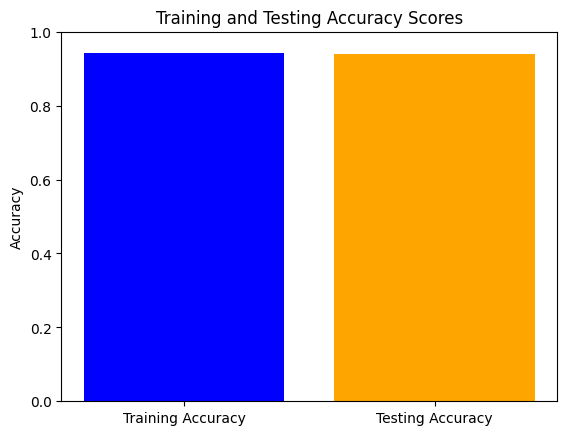

In [74]:
labels = ['Training Accuracy', 'Testing Accuracy']
scores = [training_data_accuracy, test_data_accuracy]

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.title('Training and Testing Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()